### 불편분산
- 불편 분산이 필요한 이유는 표본을 가지고 모분산을 추정할 때 , 값을 과소평가 하는 것을 막기 위함에 있다.
- 표본 평균은 표본들을 통해 구하는 평균이된다.
- 분산은 데이터가 평균으로 부터 얼마나 떨어져 있는가를 측정한 값이다.
- 즉, 평균에 따라 분산은 다르게 계산될 수 있다.
- 원래의 진짜 평균(모평균)을 기준으로 거리를 재야지만 정확한 분산을 계산할 수 있다.
- 하지만 우리는 모평균을 모르기 때문에 표본 평균을 가지고 분산을 계산해야 한다.

### 거리가 짧아지는 문제
- 표본 평균은 표본을 통해 구하는 평균이다.!!!! (이게 핵심입니다)
- 수학적으로 데이터들은 다른 어떤 값보다 '자신의 평균'과 가장 가깝습니다. (거리의 합이 최소가 되는 지점이 평균이 때문이다.)
- 진짜 모평균은 표본 평균과 조금이라도 다를 수 밖에 없다.
- 따라서 표본 평균을 기준으로 젠 거리(분산)는 진짜 모평균을 기준으로 잰 거리보다 항삭 작게 계산되는 경향이 있다.

### 해결책
- n 대신 n-1을 사용한다.!!!
- 분자가 작게 계산되었으니, 분모를 조금 줄여서 (n -> n - 1) 전체 값을 살짝 키워주는 것이 불편 분산이다.
- 이 보정 과정을 거치면 평균적으로 모분산과 거의 비슷하게 계산될 수 있다. 이것을 베셀 보정(Bessel's Correction)이라고 부른다

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 모집단 생성

# 평균이 50이고 표준 편차가 10인 데이터 100만개
population = np.random.normal(50, 10, 1000000)
# 진짜 모분산
true_variace = np.var(population)
true_variace

np.float64(100.04250872700479)

In [3]:
# 표본을 1000번 뽑아서 분산을 계산한다.
n_samples = 1000
# 표본의 크기. 크기가 작을 수록 차이가 더 심해진다.
sample_size = 5

In [4]:
# n으로 나눈 분산을 담을 리스트
biased_vars = []
# n-1로 나눈 분산을 담을 리스트
unbiased_vars = []

In [5]:
# 시행 횟수만큼 반복한다.
for _ in range(n_samples) :
    # 샘플의 개수 만큼의 표본을 추추한다.
    sample = np.random.choice(population, sample_size)

    # 편향 분산(n으로 나눔)
    biased_vars.append(np.var(sample, ddof=0))
    # 불편 분산(n-1로 나눔)
    unbiased_vars.append(np.var(sample, ddof=1))

# 평균
mean_biased = np.mean(biased_vars)
mean_unbiased = np.mean(unbiased_vars)

print(f'모집단 분산 : {true_variace}')
print(f'편향 분산 평균 : {mean_biased}')
print(f'불편 분산 평균 : {mean_unbiased}')

모집단 분산 : 100.04250872700479
편향 분산 평균 : 79.82372805981693
불편 분산 평균 : 99.77966007477117


- n 으로 나눠서 구한 분산(약 80)은 모집단의 분산(약 100)보다 턱없이 작다. 
- n-1으로 나눠서 구한 분산(약 100)은 모집단의 분산(약 100)하고 비슷하게 계산된다.
- 샘플 수가 적은 경우 편향 분산은 모집단의 분산과 차이가 크게 발생하기 때문에 이를 극복하기 위해 굉장히 많은 샘플이 필요하다.
- 얼마나 많은 샘플이 필요할 지는 직접 돌려보면서 파악해야 한다.
- 하지만 모집단의 분산을 알 수 없을 때 표분을 통해 모집단의 분산을 추정하는 것이 목적이다. 
- 따라서 얼마나 많은 샘플을 사용해야지 모집단의 분산을 추정해 볼 수 있을 지는 알 수가 없다.
- 이에 불편 분산을 활용하여 모집단은 분산을 추정할 수 있다.

In [6]:
# 표본을 1000번 뽑아서 분산을 계산한다.
n_samples = 1000
# 표본의 크기. 2 ~ 100까지 구성한다.
sample_size = list(range(2, 101))
# 모집단의 분산
mo_var = np.var(population)

# 편향분산(표준분산)을 담을 리스트
biased_var_list = []
# 불편 분산을 담을 리스트
unbiased_var_list = []

# 표본의 종류 만큼 반복한다.
for size1 in sample_size :
    # n으로 나눈 분산을 담을 리스트
    biased_vars = []
    # n-1로 나눈 분산을 담을 리스트
    unbiased_vars = []

    # 시행 횟수만큼 반복한다.
    for _ in range(n_samples) :
        # 샘플의 개수 만큼의 표본을 추추한다.
        sample = np.random.choice(population, size1)

        # 편향 분산(n으로 나눔)
        biased_vars.append(np.var(sample, ddof=0))
        # 불편 분산(n-1로 나눔)
        unbiased_vars.append(np.var(sample, ddof=1))

    # 평균
    mean_biased = np.mean(biased_vars)
    mean_unbiased = np.mean(unbiased_vars)
    
    biased_var_list.append(mean_biased)
    # 불편 분산을 담을 리스트
    unbiased_var_list.append(mean_unbiased)

In [7]:
# 그래프를 그리기 위해서 모집단의 분산을 다른 것의 개수와 동일하게 담아준다.
mo_var_list = [mo_var] * len(biased_var_list)

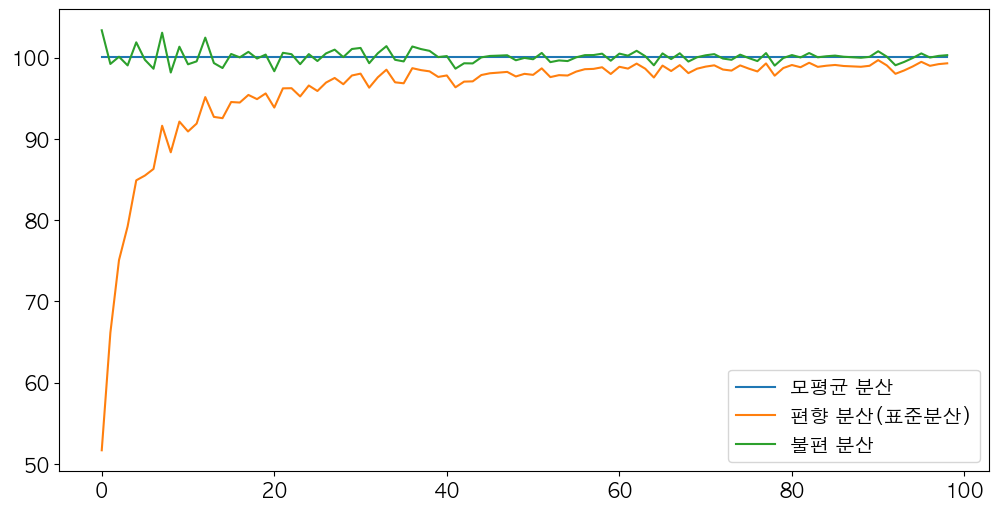

In [8]:
plt.plot(mo_var_list, label='모평균 분산')
plt.plot(biased_var_list, label='편향 분산(표준분산)')
plt.plot(unbiased_var_list, label='불편 분산')
plt.legend()
plt.show()